In [76]:


from astropy.time import Time
import pandas as pd

from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
from astroplan.plots import plot_airmass,plot_altitude
import astropy.units as u
from astropy.coordinates import SkyCoord

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import colorama
from colorama import Fore, Style
import cv2


pd.set_option("display.max_rows", None, "display.max_columns", None)

%matplotlib inline

In [106]:
# Define all the RA and DECs I want hours for
#ra = np.linspace(0,360,2)
#print(ra)
#dec = np.linspace(-90,90,2)
#print(dec)
ra=np.array(range(0, 361, 1))

dec=np.array(range(-90, 91, 1))
x,y=np.meshgrid(ra,dec)
print(ra)
print(dec)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [108]:
from datetime import datetime, timedelta

def daterange(start_date, end_date):
    delta = timedelta(minutes=20)
    while start_date < end_date:
        yield start_date
        start_date += delta
        
start_date = datetime(2021,1, 7, 18, 0)
end_date = datetime(2021, 1, 8, 6, 0)
times=[]
for single_date in daterange(start_date, end_date):
    times.append(single_date.strftime("%Y-%m-%d %H:%M:%S"))
times1=np.array(times)

times1=times1.astype(("datetime64[ns]"))
delta=end_date-start_date
total_mins = delta.total_seconds() / 60
print(total_mins) 


date_time1 = datetime.strptime(times[0], '%Y-%m-%d %H:%M:%S')
date_time2= datetime.strptime(times[1], '%Y-%m-%d %H:%M:%S')
interval=date_time2-date_time1
time_interval=interval.seconds/60
print(time_interval,'mins')


ctio = Observer.at_site("ctio", timezone = 'America/Santiago')        
kmtnet= Observer.at_site("Siding Spring Observatory", name='KMTNET',timezone = 'Australia/Sydney')

bb = np.zeros(np.shape(x))

print(bb)
bb.shape

720.0
20.0 mins
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(180, 361)

In [109]:
%%time
# Loop through each RA and DEC to calculate z (number of hours)




for ii,r in enumerate(ra):
    for jj,d in enumerate(dec):
                
        target_coord = SkyCoord(ra=r*u.deg, dec=d*u.deg)
        target = FixedTarget(coord=target_coord, name="source")
        
        
        #Airmasses at ctio
        
        airmass_ctio=ctio.altaz(times, target).secz
        masked_airmass_ctio = np.ma.array(airmass_ctio, mask=airmass_ctio < 1)

        
        #Airmasses at kmtnet
        
        airmass_kmtnet=kmtnet.altaz(times,target).secz
        masked_airmass_kmtnet = np.ma.array(airmass_kmtnet, mask=airmass_kmtnet < 1)
        
      
        #fig, ax = plt.subplots()
        #ax.invert_yaxis()
        #ax.set_ylim([3,1])
        #ax.set_title(f"the ra is {r},  dec = {d}")
        #ax2 = ax.twinx()
        #ax.plot(times, masked_airmass_ctio, '-',label='AM@ctio', color='g')
        #ax2.plot(times, masked_airmass_kmtnet,'-', label='AM@kmtnet',color='r')
        #ax2.set_ylim([3,1])
        #ax.legend(loc='best')
        #ax2.legend(loc='best')
        
        #Creating a dictionary for the dataframe
        dk={'datetimes':times,'ctio_airmass':masked_airmass_ctio,'kmtnet_airmass':masked_airmass_kmtnet}

        #Creating a dataframe
        df=pd.DataFrame(data=dk)  


        df=df.round(3)# Rounding up values 
        df=df.dropna() # Dropping NaN values but maintaining indexes in case there are NANs

        
        
        #Checking the dataframe
        #print(df)

        
        covis_list=(df[df['ctio_airmass'].between(1,3) & df['kmtnet_airmass'].between(1,3)])
        #print(covis_list)
        
        vals=np.array([df['ctio_airmass'].between(1,3) & df['kmtnet_airmass'].between(1,3)])
        
        
        
        

        if len(covis_list)==0 or len(df)==0:
            #print(0)
            mins=0
            print(f'{Fore.RED}No Co-Vis:Total time co-observable for {r} and {d} in minutes: {mins} mins{Style.RESET_ALL}')
            
            bb[jj,ii] = mins     
            
        else:
            
            vals=np.array([df['ctio_airmass'].between(1,3) & df['kmtnet_airmass'].between(1,3)])

            v=vals[0][:]
            n=int((len(v))*0.2)
            plb=np.zeros(n,dtype=bool)
            vx=np.append(plb,v) #Adding false to the beginning of the list 
            vf=np.append(vx,plb)
            v_n=1*vf #converting to binary
            z=np.zeros(len(v_n)) #Generating zeros
            vz=np.array([z,vf,z])
            
            vz=vz.astype(np.uint8)
            (thresh, gray) = cv2.threshold(vz, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

            ret, labels = cv2.connectedComponents(gray)

            k=np.unique(labels, return_counts=True)
            cb=k[1][1:]
            cvs=[]
            for i in (cb):
                cvs.append((time_interval*i))
            bgr_covis=np.max(cvs)
            total_covis=sum(cvs)
        
            print(f'{Fore.GREEN}Mulitiple ranges of Co-Vis time for ra={r} and dec={d} in minutes: {total_covis} mins{Style.RESET_ALL}')
            bb[jj,ii] = total_covis      
            #plt.figure(figsize=(20,10))
            #plt.imshow(vz)




print(np.shape(bb))
print((bb))


Mulitiple ranges of Co-Vis time for ra=0 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=0 and dec=-78 in minutes: 620.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 0 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 0 and 23 in minutes: 0 m

Mulitiple ranges of Co-Vis time for ra=1 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-62 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-60 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-59 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-57 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-56 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-54 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=1 and dec=-52 in minutes: 220.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 1 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 1 and 60 in minutes: 0 

Mulitiple ranges of Co-Vis time for ra=2 and dec=-31 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-23 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-22 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=2 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges

No Co-Vis:Total time co-observable for 2 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 2 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=3 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=3 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=3 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for

No Co-Vis:Total time co-observable for 3 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 3 and 13 in minutes: 0 mins
No Co

Mulitiple ranges of Co-Vis time for ra=4 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-70 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-67 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-65 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-62 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-60 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=4 and dec=-59 in minutes: 260.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 4 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 4 and 47 in minutes: 0 

Mulitiple ranges of Co-Vis time for ra=5 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-38 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-36 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-35 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-34 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-33 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=5 and dec=-31 in minutes: 120.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 5 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 5 and 81 in minutes: 0 

Mulitiple ranges of Co-Vis time for ra=6 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=6 and dec=-12 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=6 and dec=-11 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=6 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=6 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=6 and dec=-8 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=6 and dec=-7 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=6 and dec=-6 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 6 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 6 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 6 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 6 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 6 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 6 and 0 in minutes: 0 mins
No 

Mulitiple ranges of Co-Vis time for ra=7 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-77 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-76 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-75 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=7 and dec=-74 in minutes: 440.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 7 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 7 and 29 in minutes: 0 

Mulitiple ranges of Co-Vis time for ra=8 and dec=-60 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-59 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-57 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-56 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-54 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-50 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=8 and dec=-48 in minutes: 200.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 8 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 8 and 63 in minutes: 0 

Mulitiple ranges of Co-Vis time for ra=9 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-19 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-17 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=9 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vi

No Co-Vis:Total time co-observable for 9 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 9 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 9 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 9 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 9 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 9 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=10 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=10 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=10 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=10 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=10 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=10 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=10 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=10 and dec=-83 in mi

No Co-Vis:Total time co-observable for 10 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 10 and 21 in

Mulitiple ranges of Co-Vis time for ra=11 and dec=-69 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-67 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-66 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-65 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-62 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-60 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-59 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=11 and dec=-57 in minutes: 240.0 mins

No Co-Vis:Total time co-observable for 11 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11 and 48

Mulitiple ranges of Co-Vis time for ra=12 and dec=-42 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-40 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-39 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-35 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-34 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-33 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-32 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-31 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=12 and dec=-30 in minutes: 100.0 mins

No Co-Vis:Total time co-observable for 12 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 12 and 77

Mulitiple ranges of Co-Vis time for ra=13 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=13 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=13 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=13 and dec=-11 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=13 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=13 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=13 and dec=-8 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=13 and dec=-7 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 13 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 13 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 13 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 13 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 13 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 13 and -1 in min

Mulitiple ranges of Co-Vis time for ra=14 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-78 in minutes: 600.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-77 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-76 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=14 and dec=-75 in minutes: 440.0 mins

No Co-Vis:Total time co-observable for 14 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 14 and 30

Mulitiple ranges of Co-Vis time for ra=15 and dec=-59 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-57 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-56 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-54 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-53 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-52 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=15 and dec=-47 in minutes: 200.0 mins

No Co-Vis:Total time co-observable for 15 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 15 and 62

Mulitiple ranges of Co-Vis time for ra=16 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=16 and dec=-18 in minutes: 60.0 mins
Muliti

No Co-Vis:Total time co-observable for 16 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 16 and 88

No Co-Vis:Total time co-observable for 17 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17 and 9 in minute

Mulitiple ranges of Co-Vis time for ra=18 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-77 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-76 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-75 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-74 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-73 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-72 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-71 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-70 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-69 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-68 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=18 and dec=-67 in minutes: 320.0 mins

No Co-Vis:Total time co-observable for 18 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 18 and 38

Mulitiple ranges of Co-Vis time for ra=19 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=19 and dec=-39 in minutes: 160.0 mins

No Co-Vis:Total time co-observable for 19 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 19 and 67

Mulitiple ranges of Co-Vis time for ra=20 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=20 and dec=-13 in minutes: 40.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 20 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 20 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 20 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 20 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 20 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 20 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 20 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 20 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 20 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 20 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=21 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=21 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=21 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=21 and dec=-87 in minutes: 720.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 21 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 21 and 17 in min

Mulitiple ranges of Co-Vis time for ra=22 and dec=-72 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-71 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-70 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-69 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-68 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-67 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-66 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-65 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-64 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-63 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-62 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=22 and dec=-60 in minutes: 280.0 mins

No Co-Vis:Total time co-observable for 22 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22 and 42

Mulitiple ranges of Co-Vis time for ra=23 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-39 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=23 and dec=-35 in minutes: 140.0 mins

No Co-Vis:Total time co-observable for 23 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 23 and 77

Mulitiple ranges of Co-Vis time for ra=24 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=24 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=24 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=24 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=24 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=24 and dec=-10 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=24 and dec=-9 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 24 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 24 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 24 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 24 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 24 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 24 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 24 and -2 in minutes: 

Mulitiple ranges of Co-Vis time for ra=25 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-77 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-76 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-75 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-74 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-73 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=25 and dec=-72 in minutes: 340.0 mins

No Co-Vis:Total time co-observable for 25 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 25 and 32

Mulitiple ranges of Co-Vis time for ra=26 and dec=-58 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-57 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-56 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-54 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=26 and dec=-46 in minutes: 180.0 mins

No Co-Vis:Total time co-observable for 26 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 26 and 62

Mulitiple ranges of Co-Vis time for ra=27 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-23 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-22 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=27 and dec=-17 in minutes: 60.0 mins
Mulit

No Co-Vis:Total time co-observable for 27 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 27 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 27 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 27 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 27 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 27 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 27 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=28 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=28 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=28 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=28 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=28 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=28 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=28 and dec=-84 in minut

No Co-Vis:Total time co-observable for 28 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 28 and 14 in minute

Mulitiple ranges of Co-Vis time for ra=29 and dec=-70 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-69 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-68 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-67 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-66 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-65 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-64 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-63 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-62 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-61 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-60 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-59 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=29 and dec=-58 in minutes: 240.0 mins

No Co-Vis:Total time co-observable for 29 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 29 and 44

Mulitiple ranges of Co-Vis time for ra=30 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-46 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-44 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-38 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-36 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=30 and dec=-35 in minutes: 120.0 mins

No Co-Vis:Total time co-observable for 30 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 30 and 71

Mulitiple ranges of Co-Vis time for ra=31 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=31 and dec=-12 in minutes: 40.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 31 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 31 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 31 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 31 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 31 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 31 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 31 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 31 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 31 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=32 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=32 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=32 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=32 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=32 and dec=-86 in minutes: 720.0 mins
Mul

No Co-Vis:Total time co-observable for 32 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 32 and 17 in min

Mulitiple ranges of Co-Vis time for ra=33 and dec=-72 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-71 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-70 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-69 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-68 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-67 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-66 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-65 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-64 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-63 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-62 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-61 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=33 and dec=-60 in minutes: 220.0 mins

No Co-Vis:Total time co-observable for 33 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 33 and 43

Mulitiple ranges of Co-Vis time for ra=34 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-35 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=34 and dec=-34 in minutes: 120.0 mins

No Co-Vis:Total time co-observable for 34 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 34 and 71

Mulitiple ranges of Co-Vis time for ra=35 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=35 and dec=-9 in minutes: 20.0 mins
Mulitiple ran

Mulitiple ranges of Co-Vis time for ra=36 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-77 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-76 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=36 and dec=-75 in minutes: 380.0 mins

No Co-Vis:Total time co-observable for 36 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 36 and 32

Mulitiple ranges of Co-Vis time for ra=37 and dec=-55 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-54 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-53 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-52 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-51 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-50 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-49 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-48 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-47 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-46 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-45 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-44 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=37 and dec=-43 in minutes: 160.0 mins

No Co-Vis:Total time co-observable for 37 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 37 and 63

Mulitiple ranges of Co-Vis time for ra=38 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=38 and dec=-14 in minutes: 40.0 mins
Mulitiple 

No Co-Vis:Total time co-observable for 38 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 38 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 38 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 38 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 38 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 38 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=39 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=39 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=39 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=39 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=39 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=39 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=39 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=39 and dec=-83

No Co-Vis:Total time co-observable for 39 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 39 and 20 in 

Mulitiple ranges of Co-Vis time for ra=40 and dec=-66 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-65 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-64 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-63 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-62 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-61 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-60 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-59 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-58 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-57 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-56 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-55 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=40 and dec=-54 in minutes: 180.0 mins

No Co-Vis:Total time co-observable for 40 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 40 and 53

Mulitiple ranges of Co-Vis time for ra=41 and dec=-37 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-36 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-35 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-34 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-33 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-31 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-30 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=41 and dec=-25 in minutes: 100.0 mins

No Co-Vis:Total time co-observable for 41 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 41 and 88

No Co-Vis:Total time co-observable for 42 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 42 and 9 in minute

Mulitiple ranges of Co-Vis time for ra=43 and dec=-77 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-76 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-75 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-74 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-73 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-72 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-71 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-70 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-69 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-68 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-67 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-66 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=43 and dec=-65 in minutes: 220.0 mins

No Co-Vis:Total time co-observable for 43 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 43 and 37

Mulitiple ranges of Co-Vis time for ra=44 and dec=-50 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-49 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-48 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-47 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-46 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-45 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-44 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-43 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-42 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-41 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-40 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-39 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=44 and dec=-38 in minutes: 120.0 mins

No Co-Vis:Total time co-observable for 44 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 44 and 72

Mulitiple ranges of Co-Vis time for ra=45 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-19 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-17 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=45 and dec=-10 in minutes: 20.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 45 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 45 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 45 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 45 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 45 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=46 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=46 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=46 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=46 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=46 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=46 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=46 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=46 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=46 an

No Co-Vis:Total time co-observable for 46 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 46 and 23 

Mulitiple ranges of Co-Vis time for ra=47 and dec=-64 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-63 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-62 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-61 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-60 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-59 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-58 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-57 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-56 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-55 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-54 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-53 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=47 and dec=-52 in minutes: 140.0 mins

No Co-Vis:Total time co-observable for 47 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 47 and 54

Mulitiple ranges of Co-Vis time for ra=48 and dec=-38 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-37 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-36 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-35 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-34 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-33 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-32 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-31 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-30 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-29 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-28 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-27 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=48 and dec=-26 in minutes: 80.0 mins
Mulitip

No Co-Vis:Total time co-observable for 48 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 48 and 84

No Co-Vis:Total time co-observable for 49 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 49 and 6 in min

Mulitiple ranges of Co-Vis time for ra=50 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-77 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-76 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-75 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-74 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-73 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-72 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-71 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-70 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-69 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=50 and dec=-68 in minutes: 220.0 mins

No Co-Vis:Total time co-observable for 50 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 50 and 37

Mulitiple ranges of Co-Vis time for ra=51 and dec=-50 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-49 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-48 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-47 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-46 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-45 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-44 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-43 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-42 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-41 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-40 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-39 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=51 and dec=-38 in minutes: 80.0 mins


No Co-Vis:Total time co-observable for 51 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 51 and 70

Mulitiple ranges of Co-Vis time for ra=52 and dec=-20 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-19 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-18 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-17 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-13 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-12 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-11 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=52 and dec=-8 in minutes: 20.0 mins
Mulitiple rang

No Co-Vis:Total time co-observable for 52 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 52 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 52 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=53 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis

No Co-Vis:Total time co-observable for 53 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 53 and 25

Mulitiple ranges of Co-Vis time for ra=54 and dec=-63 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-62 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-61 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-60 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-59 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-58 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-57 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-56 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-55 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-54 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-53 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-52 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=54 and dec=-51 in minutes: 120.0 mins

No Co-Vis:Total time co-observable for 54 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 54 and 54

Mulitiple ranges of Co-Vis time for ra=55 and dec=-35 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-34 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-33 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-32 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-31 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-30 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-29 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-28 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-27 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-26 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-25 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-24 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=55 and dec=-23 in minutes: 40.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 55 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 55 and 85

No Co-Vis:Total time co-observable for 56 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 56 and 7 in minu

Mulitiple ranges of Co-Vis time for ra=57 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-77 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-76 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-75 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-74 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-73 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-72 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-71 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-70 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-69 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-68 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-67 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=57 and dec=-66 in minutes: 180.0 mins

No Co-Vis:Total time co-observable for 57 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 57 and 36

Mulitiple ranges of Co-Vis time for ra=58 and dec=-55 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-54 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-53 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-52 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-51 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-50 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-49 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-48 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-47 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-46 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-45 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-44 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=58 and dec=-43 in minutes: 80.0 mins
Muliti

No Co-Vis:Total time co-observable for 58 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 58 and 67

Mulitiple ranges of Co-Vis time for ra=59 and dec=-25 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=59 and dec=-24 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=59 and dec=-23 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=59 and dec=-22 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=59 and dec=-21 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=59 and dec=-20 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=59 and dec=-19 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=59 and dec=-18 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 59 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and -

No Co-Vis:Total time co-observable for 59 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 59 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=60 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=60 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=60 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=60 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=60 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=60 and dec=-85 in minutes: 720.0

No Co-Vis:Total time co-observable for 60 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 60 and 15 in minut

Mulitiple ranges of Co-Vis time for ra=61 and dec=-71 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-70 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-69 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-68 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-67 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-66 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-65 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-64 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-63 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-62 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-61 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-60 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=61 and dec=-59 in minutes: 120.0 mins

No Co-Vis:Total time co-observable for 61 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 61 and 45

Mulitiple ranges of Co-Vis time for ra=62 and dec=-45 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-44 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-43 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-42 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-41 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-40 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-39 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-38 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-37 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-36 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-35 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-34 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=62 and dec=-33 in minutes: 40.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 62 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 62 and 73

No Co-Vis:Total time co-observable for 63 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 63 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 

Mulitiple ranges of Co-Vis time for ra=64 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-77 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-76 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-75 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-74 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-73 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=64 and dec=-72 in minutes: 300.0 mins

No Co-Vis:Total time co-observable for 64 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 64 and 37

Mulitiple ranges of Co-Vis time for ra=65 and dec=-49 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-48 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-47 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-46 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-45 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-44 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-43 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-42 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-41 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-40 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-39 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-38 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=65 and dec=-37 in minutes: 40.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 65 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 65 and 71

No Co-Vis:Total time co-observable for 66 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 66

Mulitiple ranges of Co-Vis time for ra=67 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-77 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-76 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-75 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-74 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-73 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=67 and dec=-72 in minutes: 300.0 mins

No Co-Vis:Total time co-observable for 67 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 67 and 35

Mulitiple ranges of Co-Vis time for ra=68 and dec=-51 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-50 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-49 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-48 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-47 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-46 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-45 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-44 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-43 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-42 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-41 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-40 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=68 and dec=-39 in minutes: 20.0 mins
Mulitiple ra

No Co-Vis:Total time co-observable for 68 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 68 and 75

No Co-Vis:Total time co-observable for 69 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 69 and

Mulitiple ranges of Co-Vis time for ra=70 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-78 in minutes: 640.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-77 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-76 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-75 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-74 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-73 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-72 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-71 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-70 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=70 and dec=-69 in minutes: 200.0 mins

No Co-Vis:Total time co-observable for 70 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 70 and 36

Mulitiple ranges of Co-Vis time for ra=71 and dec=-51 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-50 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-49 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-48 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-47 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-46 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-45 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-44 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-43 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-42 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-41 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-40 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=71 and dec=-39 in minutes: 20.0 mins
No Co-Vis:To

No Co-Vis:Total time co-observable for 71 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 71 and 75

No Co-Vis:Total time co-observable for 72 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 72 and 3 i

Mulitiple ranges of Co-Vis time for ra=73 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-77 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-76 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-75 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-74 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-73 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-72 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-71 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=73 and dec=-70 in minutes: 220.0 mins

No Co-Vis:Total time co-observable for 73 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 73 and 41

Mulitiple ranges of Co-Vis time for ra=74 and dec=-45 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=74 and dec=-44 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 74 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and -32 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 74 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 74 and 79

No Co-Vis:Total time co-observable for 75 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 75 and

Mulitiple ranges of Co-Vis time for ra=76 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-77 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-76 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-75 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-74 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-73 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-72 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=76 and dec=-71 in minutes: 240.0 mins

No Co-Vis:Total time co-observable for 76 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 76 and 35

Mulitiple ranges of Co-Vis time for ra=77 and dec=-53 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=77 and dec=-52 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=77 and dec=-51 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=77 and dec=-50 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=77 and dec=-49 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=77 and dec=-48 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 77 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and -40 in minutes:

No Co-Vis:Total time co-observable for 77 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 77 and 68

No Co-Vis:Total time co-observable for 78 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 78 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 78 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=79 and dec=-79 in minutes: 720.0 mins
Mulitipl

No Co-Vis:Total time co-observable for 79 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 79 and 29

Mulitiple ranges of Co-Vis time for ra=80 and dec=-58 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=80 and dec=-57 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=80 and dec=-56 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=80 and dec=-55 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=80 and dec=-54 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=80 and dec=-53 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=80 and dec=-52 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 80 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and -45 in m

No Co-Vis:Total time co-observable for 80 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 80 and 68

No Co-Vis:Total time co-observable for 81 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 81 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for

No Co-Vis:Total time co-observable for 81 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=82 and dec=-79 in minutes: 720.0 mins
Mulitipl

No Co-Vis:Total time co-observable for 82 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 82 and 30

Mulitiple ranges of Co-Vis time for ra=83 and dec=-60 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=83 and dec=-59 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=83 and dec=-58 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=83 and dec=-57 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=83 and dec=-56 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 83 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and -47 in minutes: 0 mins

No Co-Vis:Total time co-observable for 83 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 83 and 62

No Co-Vis:Total time co-observable for 84 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 84 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 84 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=85 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=85 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=85 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=85 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=85 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=85 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=85 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=85 and dec=-83

No Co-Vis:Total time co-observable for 85 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 85 and 29

No Co-Vis:Total time co-observable for 86 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 86 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 86 and 67

No Co-Vis:Total time co-observable for 87 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable fo

No Co-Vis:Total time co-observable for 87 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 87 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=88 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis

No Co-Vis:Total time co-observable for 88 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 88 and 27

No Co-Vis:Total time co-observable for 89 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 89 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 89 and 61

No Co-Vis:Total time co-observable for 90 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 90 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 90 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=91 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges 

No Co-Vis:Total time co-observable for 91 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 91 and 28

No Co-Vis:Total time co-observable for 92 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 92 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 92 and 61

No Co-Vis:Total time co-observable for 93 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 93 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 93 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=94 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=94 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=94 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of C

No Co-Vis:Total time co-observable for 94 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 94 and 16 in minu

Mulitiple ranges of Co-Vis time for ra=95 and dec=-71 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=95 and dec=-70 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=95 and dec=-69 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=95 and dec=-68 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=95 and dec=-67 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=95 and dec=-66 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=95 and dec=-65 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 95 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and -62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and -58 i

No Co-Vis:Total time co-observable for 95 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 95 and 55

No Co-Vis:Total time co-observable for 96 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 96 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 96 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=97 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=97 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=97 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of C

No Co-Vis:Total time co-observable for 97 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 97 and 24

No Co-Vis:Total time co-observable for 98 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 98 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 98 and 66

No Co-Vis:Total time co-observable for 99 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable 

No Co-Vis:Total time co-observable for 99 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 99 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=100 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=100 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=100 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=100 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=100 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=100 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=100 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=100 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for 

No Co-Vis:Total time co-observable for 100 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 100 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable fo

Mulitiple ranges of Co-Vis time for ra=101 and dec=-70 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=101 and dec=-69 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=101 and dec=-68 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=101 and dec=-67 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=101 and dec=-66 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=101 and dec=-65 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 101 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and -62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 

No Co-Vis:Total time co-observable for 101 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 101 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 102 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and -24 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 102 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 102 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 103 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 103 a

Mulitiple ranges of Co-Vis time for ra=104 and dec=-78 in minutes: 600.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-77 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-76 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-75 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-74 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-73 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-72 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-71 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-70 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-68 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-67 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=104 and dec=-66 in minutes: 

No Co-Vis:Total time co-observable for 104 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 104 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 105 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and -32 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 105 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 105 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 106 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 106 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observa

Mulitiple ranges of Co-Vis time for ra=107 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-78 in minutes: 600.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-77 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=107 and dec=-76 in minute

No Co-Vis:Total time co-observable for 107 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 107 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 108 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and -47 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 108 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 108 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 109 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and -14 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 109 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 109 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=110 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=110 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges

No Co-Vis:Total time co-observable for 110 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 110 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 11

Mulitiple ranges of Co-Vis time for ra=111 and dec=-70 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=111 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=111 and dec=-68 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=111 and dec=-67 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=111 and dec=-66 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=111 and dec=-65 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 111 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and -62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and -

No Co-Vis:Total time co-observable for 111 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 111 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 112 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and -25 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 112 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 112 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 113 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 113 

Mulitiple ranges of Co-Vis time for ra=114 and dec=-75 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=114 and dec=-74 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=114 and dec=-73 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=114 and dec=-72 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=114 and dec=-71 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=114 and dec=-70 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=114 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=114 and dec=-68 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=114 and dec=-67 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=114 and dec=-66 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 114 and -65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and -63 in minutes: 0 mins
No Co-Vis:Total

No Co-Vis:Total time co-observable for 114 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 114 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 115 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and -29 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 115 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 115 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 116 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 116 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observa

Mulitiple ranges of Co-Vis time for ra=117 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-79 in minutes: 700.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-78 in minutes: 580.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-77 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-76 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-74 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-73 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=117 and dec=-72 in minute

No Co-Vis:Total time co-observable for 117 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 117 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 118 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and -31 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 118 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 118 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 119 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 119 

Mulitiple ranges of Co-Vis time for ra=120 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-73 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-72 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-71 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-70 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-68 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-67 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-66 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=120 and dec=-65 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 120 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and -63 in minutes: 0 mins
No Co-Vi

No Co-Vis:Total time co-observable for 120 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 120 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 121 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and -28 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 121 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 121 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 122 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 122 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable fo

Mulitiple ranges of Co-Vis time for ra=123 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-79 in minutes: 680.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-78 in minutes: 560.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-77 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-76 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=123 and dec=-73 in minute

No Co-Vis:Total time co-observable for 123 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 123 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 124 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and -43 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 124 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 124 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 125 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and -10 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 125 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 125 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=126 and dec=-80 in minutes: 720.0 mins
Muli

No Co-Vis:Total time co-observable for 126 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 126 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 127 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and -47 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 127 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 127 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 128 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and -14 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 128 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 128 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=129 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=129 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=129 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=129 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=129 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=129 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=129 and de

No Co-Vis:Total time co-observable for 129 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 129 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable fo

Mulitiple ranges of Co-Vis time for ra=130 and dec=-65 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 130 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and -52 in minutes: 0 mins
No Co-Vis:Tot

No Co-Vis:Total time co-observable for 130 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 130 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 131 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and -14 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 131 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 131 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=132 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=132 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=132 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=132 and dec=-87 in minutes: 720.0 min

No Co-Vis:Total time co-observable for 132 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 132 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for

Mulitiple ranges of Co-Vis time for ra=133 and dec=-70 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=133 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=133 and dec=-68 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=133 and dec=-67 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=133 and dec=-66 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 133 and -65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and -62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and -57 in m

No Co-Vis:Total time co-observable for 133 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 133 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 134 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and -22 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 134 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 134 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 135 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 135 a

Mulitiple ranges of Co-Vis time for ra=136 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=136 and dec=-73 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=136 and dec=-72 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=136 and dec=-71 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=136 and dec=-70 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=136 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=136 and dec=-68 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=136 and dec=-67 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=136 and dec=-66 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=136 and dec=-65 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 136 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and -62 in minutes: 0 mins
No Co-Vis:Total 

No Co-Vis:Total time co-observable for 136 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 136 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 137 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and -30 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 137 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 137 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 138 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 138 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable fo

Mulitiple ranges of Co-Vis time for ra=139 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-79 in minutes: 640.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-78 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-77 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-76 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-73 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-72 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=139 and dec=-71 in minute

No Co-Vis:Total time co-observable for 139 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 139 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 140 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and -38 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 140 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 140 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 141 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 141 and -1 in minutes: 0 mins
No Co-Vis:Total time co-obser

Mulitiple ranges of Co-Vis time for ra=142 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-78 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-77 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-76 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=142 and dec=-74 in minute

No Co-Vis:Total time co-observable for 142 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 142 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 143 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and -37 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 143 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 143 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 144 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 144 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 

Mulitiple ranges of Co-Vis time for ra=145 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-78 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-77 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-76 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-73 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-72 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-71 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-70 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=145 and dec=-68 in minutes

No Co-Vis:Total time co-observable for 145 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 145 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 146 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and -35 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 146 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 146 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 147 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 147 and -2 in minutes: 0 mins
No Co-Vis:Total time co-obse

Mulitiple ranges of Co-Vis time for ra=148 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-78 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=148 and dec=-77 in minute

No Co-Vis:Total time co-observable for 148 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 148 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 149 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and -47 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 149 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 149 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 150 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and -12 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 150 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 150 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=151 and dec=-80 in minutes: 720.0 mins
Muli

No Co-Vis:Total time co-observable for 151 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 151 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 152 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and -47 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 152 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 152 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 153 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and -13 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 153 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 153 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=154 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=154 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=154 and dec=-88 in minutes: 720.0 mins
Mulitip

No Co-Vis:Total time co-observable for 154 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 154 

Mulitiple ranges of Co-Vis time for ra=155 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-73 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-72 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-71 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-70 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-68 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-67 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-66 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=155 and dec=-65 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 155 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and -63 in minutes: 0 mins
No Co-V

No Co-Vis:Total time co-observable for 155 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 155 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 156 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and -26 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 156 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 156 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 157 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 157 

Mulitiple ranges of Co-Vis time for ra=158 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-78 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-77 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-76 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-73 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-72 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-71 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-70 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-69 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=158 and dec=-68 in minutes:

No Co-Vis:Total time co-observable for 158 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 158 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 159 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and -32 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 159 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 159 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 160 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 160 and -3 in minutes: 0 mins
No Co-Vis:Total time co-obs

Mulitiple ranges of Co-Vis time for ra=161 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-78 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-77 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-76 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-75 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-73 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=161 and dec=-72 in minute

No Co-Vis:Total time co-observable for 161 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 161 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 162 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and -40 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 162 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 162 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 163 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 163 and -3 in minutes: 0 mins
No Co-Vis:Total time co-obs

Mulitiple ranges of Co-Vis time for ra=164 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-79 in minutes: 640.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-78 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-77 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-76 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-73 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=164 and dec=-72 in minute

No Co-Vis:Total time co-observable for 164 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 164 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 165 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and -37 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 165 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 165 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 166 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 166 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable fo

Mulitiple ranges of Co-Vis time for ra=167 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-78 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-77 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-76 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-73 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=167 and dec=-72 in minute

No Co-Vis:Total time co-observable for 167 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 167 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 168 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and -31 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 168 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 168 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 169 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 169 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable fo

Mulitiple ranges of Co-Vis time for ra=170 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-79 in minutes: 640.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-77 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-76 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-75 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-74 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-73 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=170 and dec=-72 in minute

No Co-Vis:Total time co-observable for 170 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 170 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 171 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and -38 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 171 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 171 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 172 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and -9 in minutes: 0 mins
No Co-Vis:Total time 

No Co-Vis:Total time co-observable for 172 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 172 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=173 and dec=-80 in minutes: 720.0 mins
Muli

No Co-Vis:Total time co-observable for 173 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 173 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 174 and -65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and -52 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 174 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 174 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 175 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and -15 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 175 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 175 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=176 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=176 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=176 and dec=-88 in minutes: 720.0 mins
Mulitip

No Co-Vis:Total time co-observable for 176 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 176 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 17

Mulitiple ranges of Co-Vis time for ra=177 and dec=-71 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=177 and dec=-70 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=177 and dec=-69 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=177 and dec=-68 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=177 and dec=-67 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=177 and dec=-66 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 177 and -65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and -62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 

No Co-Vis:Total time co-observable for 177 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 177 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 178 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and -24 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 178 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 178 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 179 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 179 a

Mulitiple ranges of Co-Vis time for ra=180 and dec=-72 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=180 and dec=-71 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=180 and dec=-70 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=180 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=180 and dec=-68 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=180 and dec=-67 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=180 and dec=-66 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=180 and dec=-65 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 180 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and -62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observa

No Co-Vis:Total time co-observable for 180 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 180 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 181 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and -22 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 181 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 181 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 182 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 182 a

Mulitiple ranges of Co-Vis time for ra=183 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-77 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-76 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-75 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-74 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-73 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-72 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-71 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-70 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-69 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-68 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-67 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=183 and dec=-66 in minutes: 2

No Co-Vis:Total time co-observable for 183 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 183 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 184 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and -34 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 184 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 184 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 185 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 185 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable 

Mulitiple ranges of Co-Vis time for ra=186 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-77 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-76 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-75 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-74 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-73 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=186 and dec=-72 in minute

No Co-Vis:Total time co-observable for 186 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 186 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 187 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and -40 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 187 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 187 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 188 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 188 and -5 in minutes: 0 mins
No Co-Vis:Total time co-o

Mulitiple ranges of Co-Vis time for ra=189 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-79 in minutes: 640.0 mins
Mulitiple ranges of Co-Vis time for ra=189 and dec=-78 in minute

No Co-Vis:Total time co-observable for 189 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 189 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 190 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and -47 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 190 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 190 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 191 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and -15 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 191 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 191 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=192 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=192 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=192 and dec=-88 in minutes: 720.0 mins
Mulitip

No Co-Vis:Total time co-observable for 192 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 192 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 

Mulitiple ranges of Co-Vis time for ra=193 and dec=-70 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=193 and dec=-69 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=193 and dec=-68 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=193 and dec=-67 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=193 and dec=-66 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 193 and -65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and -63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and -62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and -61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and -60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and -57 in 

No Co-Vis:Total time co-observable for 193 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 193 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 194 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and -21 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 194 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 194 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 195 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 195 a

Mulitiple ranges of Co-Vis time for ra=196 and dec=-75 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-74 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-73 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-72 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-71 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-70 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-69 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-68 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-67 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-66 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=196 and dec=-65 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 196 and -64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and -63 in minutes: 0 mins
No Co-

No Co-Vis:Total time co-observable for 196 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 196 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 197 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and -35 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 197 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 197 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 198 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 198 and -3 in minutes: 0 mins
No Co-Vis:Total time co-obs

Mulitiple ranges of Co-Vis time for ra=199 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-79 in minutes: 640.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-78 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=199 and dec=-77 in minute

No Co-Vis:Total time co-observable for 199 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 199 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 200 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and -40 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 200 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 200 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 201 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 201 and -5 in minutes: 0 mins
No Co-Vis:Total time co-o

No Co-Vis:Total time co-observable for 201 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=202 and dec=-79 in minutes: 620.0 

No Co-Vis:Total time co-observable for 202 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 202 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=203 and dec=-60 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 203 and -59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and -47 in minutes: 0 mins
No Co-Vis:Tot

No Co-Vis:Total time co-observable for 203 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 203 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 204 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and -16 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 204 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 204 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=205 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=205 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=205 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=205 and dec=-87 in minutes: 720.0 min

No Co-Vis:Total time co-observable for 205 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 205 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable fo

Mulitiple ranges of Co-Vis time for ra=206 and dec=-67 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-66 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-65 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-64 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-63 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-62 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-61 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-60 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-59 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-58 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=206 and dec=-57 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 206 and -56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and -55 in minutes: 0 mins
No Co-Vis:To

No Co-Vis:Total time co-observable for 206 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 206 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 207 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and -24 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 207 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 207 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 208 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 208 a

Mulitiple ranges of Co-Vis time for ra=209 and dec=-74 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-73 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-72 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-71 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-70 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-69 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-68 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-67 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-66 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-65 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-64 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-63 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=209 and dec=-62 in minutes: 4

No Co-Vis:Total time co-observable for 209 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 209 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 210 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and -27 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 210 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 210 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 211 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 211 a

Mulitiple ranges of Co-Vis time for ra=212 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-77 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-76 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-75 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-74 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-73 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-72 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-71 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-70 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-69 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-68 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-67 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=212 and dec=-66 in minute

No Co-Vis:Total time co-observable for 212 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 212 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=213 and dec=-49 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=213 and dec=-48 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=213 and dec=-47 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 213 and -46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and -36 in minutes: 0 mins

No Co-Vis:Total time co-observable for 213 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 213 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 214 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 214 and -3 in minutes: 0 mins
No Co-Vis:Total time co-obs

Mulitiple ranges of Co-Vis time for ra=215 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-77 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=215 and dec=-76 in minute

No Co-Vis:Total time co-observable for 215 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 215 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=216 and dec=-60 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-59 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-58 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-57 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-56 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-55 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-54 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-53 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-52 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-51 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-50 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-49 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=216 and dec=-48 in minutes: 20.0 mins

No Co-Vis:Total time co-observable for 216 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 216 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 217 and -31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and -18 in minutes: 0 mins
No Co-Vis:Total time

No Co-Vis:Total time co-observable for 217 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 217 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=218 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=218 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=218 and dec=-88 in minutes: 720.0 mins
Mulitip

No Co-Vis:Total time co-observable for 218 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 218 

Mulitiple ranges of Co-Vis time for ra=219 and dec=-74 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-73 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-72 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-71 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-70 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-69 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-68 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-67 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-66 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-65 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-64 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-63 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=219 and dec=-62 in minutes

No Co-Vis:Total time co-observable for 219 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 219 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=220 and dec=-49 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-48 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-47 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-46 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-45 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-44 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-43 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-42 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-41 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-40 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-39 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-38 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=220 and dec=-37 in minutes: 20.0 mins

No Co-Vis:Total time co-observable for 220 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 220 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 221 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 221 and -3 in minutes: 0 mins
No Co-Vis:Total time co-obs

Mulitiple ranges of Co-Vis time for ra=222 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-77 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-76 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=222 and dec=-75 in minute

No Co-Vis:Total time co-observable for 222 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 222 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=223 and dec=-61 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-60 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-59 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-58 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-57 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-56 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-55 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-54 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-53 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-52 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-51 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-50 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=223 and dec=-49 in minutes: 60.0 mi

No Co-Vis:Total time co-observable for 223 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 223 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=224 and dec=-34 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=224 and dec=-33 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=224 and dec=-32 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=224 and dec=-31 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=224 and dec=-30 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=224 and dec=-29 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=224 and dec=-28 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 224 and -27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and -26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and -25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and -24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and -23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and -22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 22

No Co-Vis:Total time co-observable for 224 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 224 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 225 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 225

Mulitiple ranges of Co-Vis time for ra=226 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-77 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-76 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-75 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-74 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-73 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-72 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-71 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-70 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-69 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=226 and dec=-68 in minute

No Co-Vis:Total time co-observable for 226 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 226 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=227 and dec=-48 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-47 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-46 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-45 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-44 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-43 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-42 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-41 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-40 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-39 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-38 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-37 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=227 and dec=-36 in minutes: 40.0 mins

No Co-Vis:Total time co-observable for 227 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 227 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=228 and dec=-24 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=228 and dec=-23 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=228 and dec=-22 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=228 and dec=-21 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=228 and dec=-20 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 228 and -19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and -18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and -17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and -16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and -15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and -14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and -13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and -12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and -11 in m

No Co-Vis:Total time co-observable for 228 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 228 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=229 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=229 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=229 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=229 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=229 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=229 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=229 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=229 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=229 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co

No Co-Vis:Total time co-observable for 229 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 229 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 

Mulitiple ranges of Co-Vis time for ra=230 and dec=-66 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-65 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-64 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-63 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-62 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-61 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-60 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-59 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-58 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-57 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-56 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-55 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=230 and dec=-54 in minute

No Co-Vis:Total time co-observable for 230 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 230 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=231 and dec=-37 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-36 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-35 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-34 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-33 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-32 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-31 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-30 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-29 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-28 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-27 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-26 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=231 and dec=-25 in minutes: 40.0 mins

No Co-Vis:Total time co-observable for 231 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 231 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable

No Co-Vis:Total time co-observable for 232 and -11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 232 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable 

Mulitiple ranges of Co-Vis time for ra=233 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-77 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-76 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-75 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-74 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-73 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-72 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-71 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-70 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=233 and dec=-69 in minute

No Co-Vis:Total time co-observable for 233 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 233 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=234 and dec=-55 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-54 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-53 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-52 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-51 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-50 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-49 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-48 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-47 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-46 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-45 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-44 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=234 and dec=-43 in minutes:

No Co-Vis:Total time co-observable for 234 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 234 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=235 and dec=-31 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-30 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-29 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-28 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-27 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-26 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-25 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-24 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-23 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-22 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-21 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-20 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=235 and dec=-19 in minutes: 40.0 mins

No Co-Vis:Total time co-observable for 235 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 235 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=236 and dec=-7 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=236 and dec=-6 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 236 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 236 and 6 in minutes: 0 mins
No Co-Vis:Total time co-obs

Mulitiple ranges of Co-Vis time for ra=237 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-77 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-76 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-75 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-74 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-73 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-72 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-71 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=237 and dec=-70 in minute

No Co-Vis:Total time co-observable for 237 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 237 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=238 and dec=-61 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-60 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-59 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-58 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-57 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-56 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-55 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-54 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-53 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-52 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-51 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-50 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=238 and dec=-49 in minute

No Co-Vis:Total time co-observable for 238 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 238 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=239 and dec=-38 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-37 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-36 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-35 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-34 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-33 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-32 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-31 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-30 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-29 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-28 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-27 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=239 and dec=-26 in minutes: 60.0 mi

No Co-Vis:Total time co-observable for 239 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 239 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=240 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=240 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=240 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=240 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=240 and dec=-8 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=240 and dec=-7 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 240 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 240 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 240 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 240 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 240 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 240 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 240 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 240 and 1 in minutes

Mulitiple ranges of Co-Vis time for ra=241 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-77 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-76 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-75 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-74 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-73 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-72 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-71 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=241 and dec=-70 in minute

No Co-Vis:Total time co-observable for 241 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 241 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=242 and dec=-53 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-52 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-51 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-50 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-49 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-48 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-47 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-46 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-45 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-44 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-43 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-42 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=242 and dec=-41 in minute

No Co-Vis:Total time co-observable for 242 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 242 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=243 and dec=-29 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-28 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-27 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-26 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=243 and dec=-17 in minutes: 60.0 mins

No Co-Vis:Total time co-observable for 243 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 243 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time fo

No Co-Vis:Total time co-observable for 244 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 244 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 24

Mulitiple ranges of Co-Vis time for ra=245 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-77 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-76 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-75 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-74 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-73 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-72 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-71 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-70 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-69 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=245 and dec=-68 in minute

No Co-Vis:Total time co-observable for 245 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 245 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=246 and dec=-56 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-55 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-54 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-53 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-52 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-51 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-50 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-49 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-48 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-47 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-46 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-45 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=246 and dec=-44 in minute

No Co-Vis:Total time co-observable for 246 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 246 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=247 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-31 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=247 and dec=-20 in minutes: 

No Co-Vis:Total time co-observable for 247 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 247 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=248 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=248 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges

No Co-Vis:Total time co-observable for 248 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 248 a

Mulitiple ranges of Co-Vis time for ra=249 and dec=-79 in minutes: 600.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-78 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-77 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-76 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-75 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-74 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-73 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-72 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-71 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-70 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-69 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-68 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=249 and dec=-67 in minute

No Co-Vis:Total time co-observable for 249 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 249 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=250 and dec=-50 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-49 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-48 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-47 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-46 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-45 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-44 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-43 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-42 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-41 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-40 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-39 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=250 and dec=-38 in minute

No Co-Vis:Total time co-observable for 250 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 250 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=251 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-15 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=251 and dec=-12 in minutes: 20.0 min

No Co-Vis:Total time co-observable for 251 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 251 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 251 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 251 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 251 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 251 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 251 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 251 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 251 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 251 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=252 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=252 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=252 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=252 and dec=-87 in minutes: 720.0 min

No Co-Vis:Total time co-observable for 252 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 252 

Mulitiple ranges of Co-Vis time for ra=253 and dec=-71 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-70 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-69 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-68 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-67 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-66 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-65 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-64 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-63 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-62 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-61 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-60 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=253 and dec=-59 in minute

No Co-Vis:Total time co-observable for 253 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 253 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=254 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-38 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-36 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-35 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-34 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-33 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-31 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=254 and dec=-30 in minute

No Co-Vis:Total time co-observable for 254 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 254 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=255 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-8 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=255 and dec=-7 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 255 and -6 in minutes: 0 mins
No Co-Vis:

No Co-Vis:Total time co-observable for 255 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 255 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 255 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=256 and dec=-81 in minutes: 720.0 mins
Mulitiple ran

No Co-Vis:Total time co-observable for 256 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 256 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 

Mulitiple ranges of Co-Vis time for ra=257 and dec=-70 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-69 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-68 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-67 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-66 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-65 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-64 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-63 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-62 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-61 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-60 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-59 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=257 and dec=-58 in minute

No Co-Vis:Total time co-observable for 257 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 257 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=258 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-35 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-34 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-33 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=258 and dec=-31 in minute

No Co-Vis:Total time co-observable for 258 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 258 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=259 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=259 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=259 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=259 and dec=-10 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=259 and dec=-9 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 259 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 259 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 259 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 259 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 259 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 259 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 259 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 259 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 259 and 0 in minutes: 0 m

Mulitiple ranges of Co-Vis time for ra=260 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-79 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-77 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-76 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-75 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-74 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=260 and dec=-73 in minute

No Co-Vis:Total time co-observable for 260 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 260 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=261 and dec=-58 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-57 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-56 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-55 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-54 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=261 and dec=-46 in minute

No Co-Vis:Total time co-observable for 261 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 261 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=262 and dec=-35 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-34 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-33 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-31 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=262 and dec=-23 in minute

No Co-Vis:Total time co-observable for 262 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 262 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=263 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=263 and dec=-8 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 263 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 263 and 4 in minutes: 0 mins
No Co-Vis:Total time co-o

Mulitiple ranges of Co-Vis time for ra=264 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-79 in minutes: 600.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-78 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-77 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-76 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-75 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-74 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-73 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-72 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-71 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-70 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=264 and dec=-69 in minute

No Co-Vis:Total time co-observable for 264 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 264 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=265 and dec=-57 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-56 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-54 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-53 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-46 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=265 and dec=-45 in minute

No Co-Vis:Total time co-observable for 265 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 265 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=266 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=266 and dec=-15 in minutes: 60.0 

No Co-Vis:Total time co-observable for 266 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 266 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time fo

Mulitiple ranges of Co-Vis time for ra=267 and dec=-8 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=267 and dec=-7 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=267 and dec=-6 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 267 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 267 and 5 in minutes: 0 mins
No Co-Vis:Total tim

Mulitiple ranges of Co-Vis time for ra=268 and dec=-79 in minutes: 600.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-77 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-76 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-75 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-74 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-73 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-72 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-71 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-70 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-69 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-68 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=268 and dec=-67 in minute

No Co-Vis:Total time co-observable for 268 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 268 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=269 and dec=-59 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-57 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-56 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-54 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-53 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=269 and dec=-47 in minute

No Co-Vis:Total time co-observable for 269 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 269 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=270 and dec=-35 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-34 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-33 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-31 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-30 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-29 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=270 and dec=-23 in minutes:

No Co-Vis:Total time co-observable for 270 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 270 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=271 and dec=-6 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 271 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 271 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable 

Mulitiple ranges of Co-Vis time for ra=272 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-77 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-76 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-75 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-74 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-73 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-72 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-71 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-70 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-69 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-68 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-67 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=272 and dec=-66 in minute

No Co-Vis:Total time co-observable for 272 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 272 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=273 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=273 and dec=-36 in minute

No Co-Vis:Total time co-observable for 273 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 273 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=274 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-19 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-17 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=274 and dec=-13 in minutes: 40.0 mins

No Co-Vis:Total time co-observable for 274 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 274 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 274 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 274 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 274 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 274 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 274 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 274 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=275 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=275 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=275 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=275 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=275 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=275 and dec=-85 in 

No Co-Vis:Total time co-observable for 275 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 275 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 

Mulitiple ranges of Co-Vis time for ra=276 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-65 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-62 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-60 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-59 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-57 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-56 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=276 and dec=-54 in minute

No Co-Vis:Total time co-observable for 276 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 276 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=277 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-40 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-39 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-35 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-34 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-33 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-31 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=277 and dec=-29 in minute

No Co-Vis:Total time co-observable for 277 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 277 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=278 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=278 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=278 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=278 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=278 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=278 and dec=-8 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 278 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 278 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 278 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 278 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 278 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 278 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 278 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 278 and 0 in minut

Mulitiple ranges of Co-Vis time for ra=279 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-79 in minutes: 600.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-78 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-77 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-76 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-75 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=279 and dec=-74 in minute

No Co-Vis:Total time co-observable for 279 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 279 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=280 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-54 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-53 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-46 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-44 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=280 and dec=-43 in minute

No Co-Vis:Total time co-observable for 280 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 280 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=281 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=281 and dec=-16 in minutes: 60.0

No Co-Vis:Total time co-observable for 281 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 281 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 281 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 281 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 281 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 281 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 281 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 281 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 281 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=282 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=282 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=282 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=282 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=282 and dec=-86 in minutes: 

No Co-Vis:Total time co-observable for 282 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 282 a

Mulitiple ranges of Co-Vis time for ra=283 and dec=-75 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-74 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-73 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-72 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-71 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-70 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-68 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-67 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-65 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-64 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=283 and dec=-63 in minute

No Co-Vis:Total time co-observable for 283 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 283 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=284 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-46 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-44 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=284 and dec=-41 in minute

No Co-Vis:Total time co-observable for 284 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 284 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=285 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=285 and dec=-16 in minutes: 40.0 m

No Co-Vis:Total time co-observable for 285 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 285 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=286 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vi

No Co-Vis:Total time co-observable for 286 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 286 a

Mulitiple ranges of Co-Vis time for ra=287 and dec=-78 in minutes: 540.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-77 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-76 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-75 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-74 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-73 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-72 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-67 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=287 and dec=-66 in minute

No Co-Vis:Total time co-observable for 287 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 287 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=288 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=288 and dec=-39 in minute

No Co-Vis:Total time co-observable for 288 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 288 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=289 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-19 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-17 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=289 and dec=-10 in minutes: 40.0 mins

No Co-Vis:Total time co-observable for 289 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 289 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 289 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=290 and dec=-81 in minutes: 720.0 mins
Mulitiple ran

No Co-Vis:Total time co-observable for 290 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 290 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for

Mulitiple ranges of Co-Vis time for ra=291 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-67 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-65 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-62 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-60 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-59 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=291 and dec=-57 in minute

No Co-Vis:Total time co-observable for 291 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 291 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=292 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-42 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-40 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-39 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-35 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-34 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=292 and dec=-33 in minute

No Co-Vis:Total time co-observable for 292 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 292 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=293 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=293 and dec=-10 in minutes: 20.0 mins

No Co-Vis:Total time co-observable for 293 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 293 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 293 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=294 and dec=-81 in minutes: 720.0 mins
Mulitiple ran

No Co-Vis:Total time co-observable for 294 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 294 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 

Mulitiple ranges of Co-Vis time for ra=295 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-67 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-66 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-65 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-63 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-62 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-60 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-59 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-57 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=295 and dec=-56 in minute

No Co-Vis:Total time co-observable for 295 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 295 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=296 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-39 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-35 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=296 and dec=-34 in minute

No Co-Vis:Total time co-observable for 296 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 296 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=297 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-15 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-12 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-11 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=297 and dec=-9 in minutes: 20.0 mins


No Co-Vis:Total time co-observable for 297 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=298 and dec=-79 in minutes: 640.0 

No Co-Vis:Total time co-observable for 298 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 298 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for

Mulitiple ranges of Co-Vis time for ra=299 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-67 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-65 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-62 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-60 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-59 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=299 and dec=-58 in minute

No Co-Vis:Total time co-observable for 299 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 299 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=300 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-46 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-44 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-38 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=300 and dec=-36 in minute

No Co-Vis:Total time co-observable for 300 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 300 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=301 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-15 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-12 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=301 and dec=-11 in minutes: 20.0 mins

No Co-Vis:Total time co-observable for 301 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 301 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 301 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 301 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 301 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 301 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 301 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 301 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=302 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=302 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=302 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=302 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=302 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=302 and dec=-85 in 

No Co-Vis:Total time co-observable for 302 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 302 a

Mulitiple ranges of Co-Vis time for ra=303 and dec=-77 in minutes: 560.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-76 in minutes: 540.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-75 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-74 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-73 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-72 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-70 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-68 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-67 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=303 and dec=-65 in minute

No Co-Vis:Total time co-observable for 303 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 303 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=304 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-46 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-44 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=304 and dec=-39 in minute

No Co-Vis:Total time co-observable for 304 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 304 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=305 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=305 and dec=-12 in minutes: 40.0 mins

No Co-Vis:Total time co-observable for 305 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 305 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 305 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 305 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 305 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 305 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 305 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 305 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 305 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 305 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=306 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=306 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=306 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=306 and dec=-87 in minutes: 720.0 min

No Co-Vis:Total time co-observable for 306 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 306 a

Mulitiple ranges of Co-Vis time for ra=307 and dec=-77 in minutes: 580.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-76 in minutes: 560.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-75 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-74 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-73 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-72 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-67 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=307 and dec=-65 in minute

No Co-Vis:Total time co-observable for 307 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 307 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=308 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-50 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=308 and dec=-39 in minute

No Co-Vis:Total time co-observable for 308 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 308 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=309 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-26 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-19 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-17 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=309 and dec=-15 in minutes: 40.0 min

No Co-Vis:Total time co-observable for 309 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 309 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 309 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 309 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 309 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 309 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 309 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 309 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 309 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 309 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=310 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=310 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=310 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=310 and dec=-87 in minutes: 720.0 min

No Co-Vis:Total time co-observable for 310 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 310 a

Mulitiple ranges of Co-Vis time for ra=311 and dec=-74 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-73 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-72 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-71 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-67 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-65 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=311 and dec=-62 in minute

No Co-Vis:Total time co-observable for 311 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 311 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=312 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-50 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-48 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-42 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-40 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=312 and dec=-39 in minute

No Co-Vis:Total time co-observable for 312 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 312 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=313 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=313 and dec=-17 in minutes: 60.0 

No Co-Vis:Total time co-observable for 313 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 313 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=314 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=314 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=314 and dec=-88 in minutes: 720.0 mins
Mulitip

No Co-Vis:Total time co-observable for 314 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 314 a

Mulitiple ranges of Co-Vis time for ra=315 and dec=-79 in minutes: 700.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-78 in minutes: 640.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-77 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-76 in minutes: 580.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-75 in minutes: 540.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-74 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-73 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-72 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=315 and dec=-67 in minute

No Co-Vis:Total time co-observable for 315 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 315 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=316 and dec=-57 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-56 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-54 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=316 and dec=-45 in minute

No Co-Vis:Total time co-observable for 316 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 316 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=317 and dec=-31 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-22 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=317 and dec=-19 in minutes: 6

No Co-Vis:Total time co-observable for 317 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 317 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=318 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=318 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges

No Co-Vis:Total time co-observable for 318 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 318

Mulitiple ranges of Co-Vis time for ra=319 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-67 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-65 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-62 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-60 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=319 and dec=-59 in minute

No Co-Vis:Total time co-observable for 319 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 319 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=320 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-38 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-35 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-34 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-33 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-31 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-30 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-29 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=320 and dec=-28 in minute

No Co-Vis:Total time co-observable for 320 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 320 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=321 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-15 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-12 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-11 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-8 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=321 and dec=-7 in minutes: 20.0 mins
Mu

No Co-Vis:Total time co-observable for 321 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=322 and dec=-79 in minutes: 720.0 

No Co-Vis:Total time co-observable for 322 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 322 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=323 and dec=-64 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-62 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-61 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-60 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-59 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-57 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-56 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-54 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=323 and dec=-52 in minute

No Co-Vis:Total time co-observable for 323 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 323 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=324 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-38 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-35 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-34 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-33 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-31 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-30 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-29 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=324 and dec=-27 in minute

No Co-Vis:Total time co-observable for 324 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 324 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=325 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=325 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=325 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=325 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=325 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=325 and dec=-8 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 325 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 325 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 325 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 325 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 325 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 325 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 325 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 325 and 0 in minut

Mulitiple ranges of Co-Vis time for ra=326 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-78 in minutes: 700.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-77 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-76 in minutes: 560.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-75 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=326 and dec=-74 in minute

No Co-Vis:Total time co-observable for 326 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 326 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=327 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-54 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-50 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-48 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=327 and dec=-43 in minute

No Co-Vis:Total time co-observable for 327 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 327 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=328 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=328 and dec=-18 in minutes: 60.

No Co-Vis:Total time co-observable for 328 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 328 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=329 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vi

No Co-Vis:Total time co-observable for 329 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 329 a

Mulitiple ranges of Co-Vis time for ra=330 and dec=-72 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-67 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-65 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-64 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-63 in minutes: 320.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-62 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=330 and dec=-60 in minute

No Co-Vis:Total time co-observable for 330 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 330 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=331 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-39 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=331 and dec=-36 in minute

No Co-Vis:Total time co-observable for 331 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 331 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=332 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-22 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-15 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=332 and dec=-13 in minutes: 40.0 mi

No Co-Vis:Total time co-observable for 332 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 332 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 332 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 332 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 332 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 332 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 332 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 332 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 332 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 332 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=333 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=333 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=333 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=333 and dec=-87 in minutes: 720.0 min

No Co-Vis:Total time co-observable for 333 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 333 a

Mulitiple ranges of Co-Vis time for ra=334 and dec=-78 in minutes: 700.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-77 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-76 in minutes: 560.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-75 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-74 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-73 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-72 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-67 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=334 and dec=-66 in minute

No Co-Vis:Total time co-observable for 334 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 334 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=335 and dec=-52 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-46 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-44 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=335 and dec=-40 in minute

No Co-Vis:Total time co-observable for 335 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 335 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=336 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-17 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-16 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-15 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=336 and dec=-13 in minutes: 40.0 min

No Co-Vis:Total time co-observable for 336 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 336 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 336 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=337 and dec=-81 in minutes: 720.0 mins
Mulitiple ran

No Co-Vis:Total time co-observable for 337 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 12 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 13 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 337 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 

Mulitiple ranges of Co-Vis time for ra=338 and dec=-66 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-65 in minutes: 340.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-64 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-63 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-62 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-61 in minutes: 300.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-60 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-59 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-57 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-56 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=338 and dec=-54 in minute

No Co-Vis:Total time co-observable for 338 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 40 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 338 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=339 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-44 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-39 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-38 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-37 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-36 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-35 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-34 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=339 and dec=-33 in minute

No Co-Vis:Total time co-observable for 339 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 66 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 67 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 68 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 69 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 339 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=340 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=340 and dec=-15 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=340 and dec=-14 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=340 and dec=-13 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=340 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=340 and dec=-11 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=340 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=340 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=340 and dec=-8 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 340 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 340 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 340 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 340 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observabl

Mulitiple ranges of Co-Vis time for ra=341 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-87 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-86 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-85 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-84 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-78 in minutes: 680.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-77 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=341 and dec=-76 in minute

No Co-Vis:Total time co-observable for 341 and 14 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 15 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 341 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=342 and dec=-61 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-60 in minutes: 280.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-59 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-58 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-57 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-56 in minutes: 260.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-54 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-50 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=342 and dec=-49 in minute

No Co-Vis:Total time co-observable for 342 and 41 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 42 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 43 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 44 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 342 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=343 and dec=-35 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-34 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-33 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-31 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=343 and dec=-23 in minutes

No Co-Vis:Total time co-observable for 343 and 70 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 343 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=344 and dec=-9 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 344 and -8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 344 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observab

Mulitiple ranges of Co-Vis time for ra=345 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-78 in minutes: 660.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-77 in minutes: 600.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-76 in minutes: 580.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-75 in minutes: 540.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-74 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-73 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-72 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=345 and dec=-70 in minute

No Co-Vis:Total time co-observable for 345 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 345 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=346 and dec=-57 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-56 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-54 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-53 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-51 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=346 and dec=-45 in minute

No Co-Vis:Total time co-observable for 346 and 45 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 46 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 346 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=347 and dec=-33 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-32 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-31 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-24 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-22 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=347 and dec=-21 in minutes:

No Co-Vis:Total time co-observable for 347 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 347 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=348 and dec=-12 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=348 and dec=-11 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=348 and dec=-10 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=348 and dec=-9 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=348 and dec=-8 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 348 and -7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 348 and -6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 348 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 348 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 348 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 348 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 348 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 348 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 348 and 1 in minutes: 0 min

Mulitiple ranges of Co-Vis time for ra=349 and dec=-83 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-82 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-81 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-80 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-78 in minutes: 640.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-77 in minutes: 600.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-76 in minutes: 560.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-75 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-74 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-73 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-72 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=349 and dec=-71 in minute

No Co-Vis:Total time co-observable for 349 and 16 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 17 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 18 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 19 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 20 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 21 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 22 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 23 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 24 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 25 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 349 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=350 and dec=-57 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-56 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-55 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-54 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-53 in minutes: 240.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-52 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-46 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=350 and dec=-45 in minute

No Co-Vis:Total time co-observable for 350 and 47 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 48 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 350 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=351 and dec=-30 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-29 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-26 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-25 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-21 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-20 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-19 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=351 and dec=-18 in minutes: 60.

No Co-Vis:Total time co-observable for 351 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 351 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=352 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=352 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges

Mulitiple ranges of Co-Vis time for ra=352 and dec=-6 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 352 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 352 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable 

Mulitiple ranges of Co-Vis time for ra=353 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-77 in minutes: 580.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-76 in minutes: 540.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-75 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-74 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-73 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-72 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-68 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=353 and dec=-67 in minute

No Co-Vis:Total time co-observable for 353 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 353 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=354 and dec=-52 in minutes: 220.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-51 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-50 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-47 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-43 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=354 and dec=-40 in minute

No Co-Vis:Total time co-observable for 354 and 49 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 50 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 51 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 354 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=355 and dec=-32 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-31 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-30 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-29 in minutes: 120.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-28 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-26 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=355 and dec=-20 in minutes: 80.

No Co-Vis:Total time co-observable for 355 and 71 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 72 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 73 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 74 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 75 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 76 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 77 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 78 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 79 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 355 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=356 and dec=-8 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=356 and dec=-7 in minutes: 20.0 mins
Mulitiple ranges of Co-Vis time for ra=356 and dec=-6 in minutes: 20.0 mins
No Co-Vis:Total time co-observable for 356 and -5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and -4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and -3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 356 and 5 in minutes: 0 mins
No Co-Vis:Total tim

Mulitiple ranges of Co-Vis time for ra=357 and dec=-79 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-78 in minutes: 620.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-77 in minutes: 560.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-76 in minutes: 520.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-75 in minutes: 500.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-74 in minutes: 480.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-73 in minutes: 460.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-72 in minutes: 440.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-71 in minutes: 420.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-70 in minutes: 400.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-69 in minutes: 380.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-68 in minutes: 360.0 mins
Mulitiple ranges of Co-Vis time for ra=357 and dec=-67 in minute

No Co-Vis:Total time co-observable for 357 and 26 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 27 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 28 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 29 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 30 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 31 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 32 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 33 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 34 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 35 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 36 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 37 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 38 in minutes: 0 mins
No Co-Vis:Total time co-observable for 357 and 39 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=358 and dec=-49 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-48 in minutes: 200.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-47 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-46 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-45 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-44 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-43 in minutes: 180.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-42 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-41 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-40 in minutes: 160.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-39 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-38 in minutes: 140.0 mins
Mulitiple ranges of Co-Vis time for ra=358 and dec=-37 in minute

No Co-Vis:Total time co-observable for 358 and 52 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 53 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 54 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 55 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 56 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 57 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 58 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 59 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 60 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 61 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 62 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 63 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 64 in minutes: 0 mins
No Co-Vis:Total time co-observable for 358 and 65 in minutes: 0 mins
No Co-Vis:Total time co-observable

Mulitiple ranges of Co-Vis time for ra=359 and dec=-27 in minutes: 100.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-26 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-25 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-24 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-23 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-22 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-21 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-20 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-19 in minutes: 80.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-18 in minutes: 60.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-17 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-16 in minutes: 40.0 mins
Mulitiple ranges of Co-Vis time for ra=359 and dec=-15 in minutes: 40.0 min

No Co-Vis:Total time co-observable for 359 and 80 in minutes: 0 mins
No Co-Vis:Total time co-observable for 359 and 81 in minutes: 0 mins
No Co-Vis:Total time co-observable for 359 and 82 in minutes: 0 mins
No Co-Vis:Total time co-observable for 359 and 83 in minutes: 0 mins
No Co-Vis:Total time co-observable for 359 and 84 in minutes: 0 mins
No Co-Vis:Total time co-observable for 359 and 85 in minutes: 0 mins
No Co-Vis:Total time co-observable for 359 and 86 in minutes: 0 mins
No Co-Vis:Total time co-observable for 359 and 87 in minutes: 0 mins
No Co-Vis:Total time co-observable for 359 and 88 in minutes: 0 mins
No Co-Vis:Total time co-observable for 359 and 89 in minutes: 0 mins
Mulitiple ranges of Co-Vis time for ra=360 and dec=-90 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=360 and dec=-89 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=360 and dec=-88 in minutes: 720.0 mins
Mulitiple ranges of Co-Vis time for ra=360 and dec=-87 in minutes: 720.0 min

No Co-Vis:Total time co-observable for 360 and -2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and -1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 0 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 1 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 2 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 3 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 4 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 5 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 6 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 7 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 8 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 9 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 10 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 and 11 in minutes: 0 mins
No Co-Vis:Total time co-observable for 360 a

Text(0, 0.5, 'DEC')

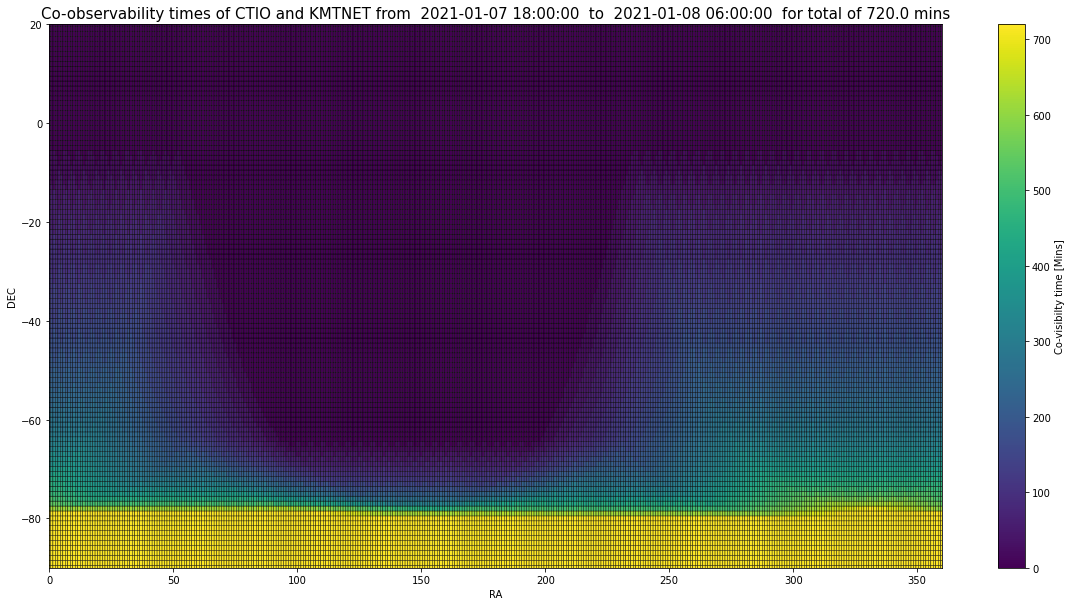

In [111]:
# Plot

fig, axs = plt.subplots(figsize=(20,10))
c=plt.pcolor(x,y,bb,shading='auto', edgecolors='k', linewidths=0.4)
fig.colorbar(c, ax=axs,label='Co-visibilty time [Mins]')
plt.title(f"Co-observability times of {ctio.name.upper()} and {kmtnet.name} from  {start_date}  to "\
          
          f" {end_date}  for total of {total_mins} mins",fontsize=15)
          
plt.ylim(-90,20)
plt.xlim(0,360)
plt.xlabel('RA')
plt.ylabel('DEC')